In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

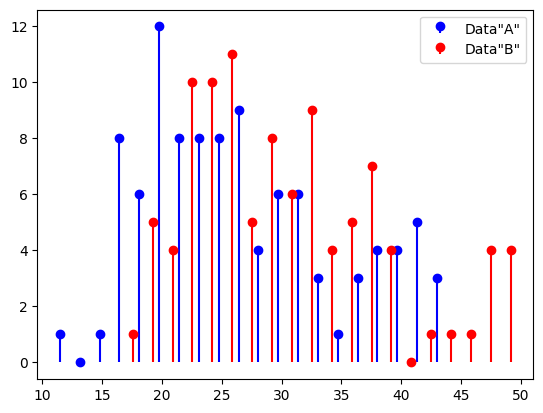

In [3]:
## simulate two distributions 

#number of trials

N= 100

# dataset "A" # 그냥 데이 생성하려 했다고 함.. 별이유 없음
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA, xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "b"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

# get histogram values for later comparison
yB, xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2

plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [4]:
## mixtrials together 

# concatenate trials
alldata =np.hstack((dataA,dataB))

# condition Labels
conds = np.hstack((np.ones(N),2*np.ones(N))) ## 어느것이 dataA,B인지 식별하기 위헤

In [5]:
## generate one Null hyphothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition Labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2

# these two means should be different
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])

# 원래 그룹들의 차이와 무작위로 섞은 그룹의 차이가 동일하다고 가정한다.
# 현재는 표본이 1개뿐이므로, 신뢰가 없어 여러번 반복하여 분포를 만들어야 한다.

[26.72089037875724, 30.612632071899395]
[28.418033044417253, 28.915489406239384]


<function matplotlib.pyplot.show(close=None, block=None)>

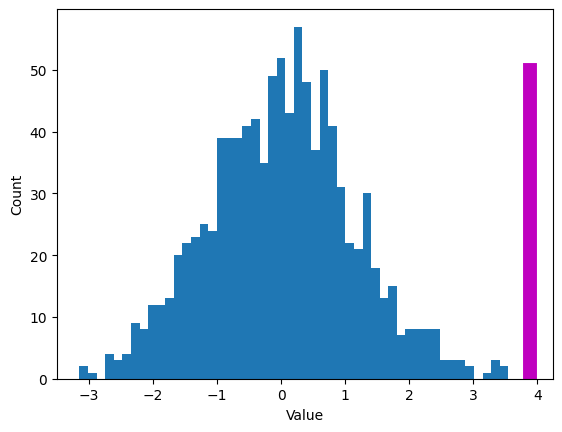

In [6]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2])-np.mean(alldata[fconds==1])

# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2])-np.mean(alldata[conds==1])
plt.plot([obsval,obsval],[0,50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show

## 이제 질문은, 이 값이 분포의 중심에 충분히 떨어져 있는지, 그래서 우리가 이것을 통계적으로 유의미하다고 판단할 수 있는지 여부

In [7]:
## two methods of evaluating statistical significance

# Z-value
zVal= (obsval-np.mean(permdiffs))/np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.0002842392340098865 0.0


In [60]:
k = range(100,5000,10)
av = np.zeros(len(k))

for idx,ki in enumerate(k):
    permdiffs = np.zeros(ki)
    for permi in range(ki):
            fconds = np.random.permutation(N*2)
            fconds[fconds<N] = 1
            fconds[fconds>1] = 2
            permdiffs[permi] = np.mean(alldata[fconds==2])-np.mean(alldata[fconds==1])

    av[idx] = (obsval-np.mean(permdiffs))/np.std(permdiffs,ddof=1)


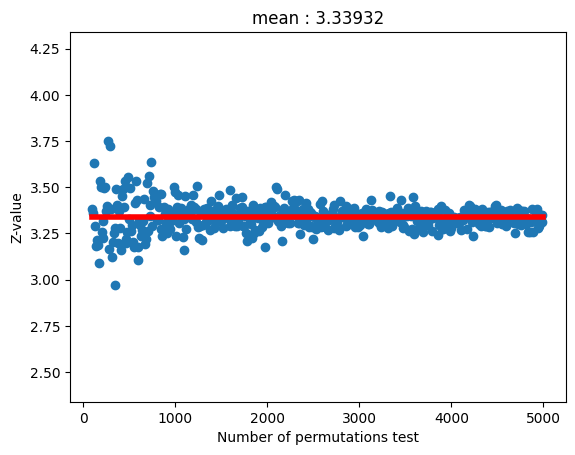

In [73]:
mean_av = np.mean(av)
plt.plot(k,av,'o')
plt.plot([100,5000],[mean_av,mean_av],'r',linewidth=4)
plt.title('mean : %g'%mean_av)
plt.xlabel('Number of permutations test')
plt.ylim([mean_av-1,mean_av+1])
plt.ylabel('Z-value')
plt.show()

Text(0.5, 0, 'Z-value')

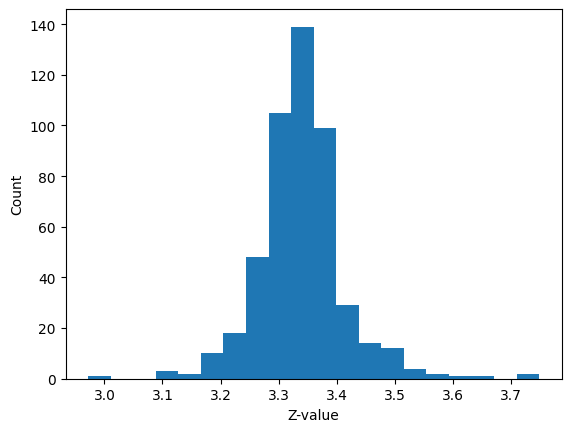

In [70]:
plt.hist(av,bins=20)
plt.ylabel('Count')
plt.xlabel('Z-value') 